In [1]:

!pip install nlpaug
!pip install langdetect
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
import nlpaug.augmenter.sentence as nas
from lightgbm import LGBMClassifier
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
from textblob import Word, TextBlob
from sklearn import model_selection
from langdetect import detect_langs
from sklearn.utils import resample
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import drive
from nlpaug.util import Action
from string import punctuation
from sklearn.svm import SVC
import nlpaug.flow as naf
from tqdm import tqdm
import seaborn as sns
import pandas as pd
import numpy as np
import string
import nltk
import re
import os
drive.mount('/content/Drive')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

all_data_path = '/content/Drive/MyDrive/Applied_Artificial_Intelligence/Dataset/all_data.csv'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 8.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 26.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=61a2f3e7c737cd736d063b66bb898f5569ad094ba57df9564b2e8f847b8ef187
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect
Mounted at /content/Drive


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Data Description

In [2]:
# Assign columns to data
df_all_data = pd.read_csv(all_data_path, names=['Sentiment', 'Sentence'], encoding="latin-1")

In [3]:
# Detect the Language of the Sentence and print its probability
sentence = list(df_all_data.Sentence)
languages = []

for i in range(len(sentence)):
    languages.append(detect_langs(sentence[i]))
    
print('The detected languages are: ', languages[:2])

The detected languages are:  [[en:0.9999976047190546], [en:0.9999979600834648]]


In [4]:
# View the data
df_all_data.head(5)

,Sentiment,Sentence
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
# Show info of data
df_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   Sentence   4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [6]:
# Describe Data
df_all_data.describe()

,Sentiment,Sentence
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [7]:
# Get minimum, average and maximum length of sentence

sentence_length_all_data = np.array(list(map(len, df_all_data["Sentence"].str.split(' '))))

print("The average number of words in a sentence is: {}".format(np.mean(sentence_length_all_data)))
print("The minimum number of words in a sentence is: {}".format(min(sentence_length_all_data)))
print("The maximum number of words in a sentence is: {}".format(max(sentence_length_all_data)))

The average number of words in a sentence is: 23.10957490713991
The minimum number of words in a sentence is: 2
The maximum number of words in a sentence is: 81


<ipython-input-8-45871a84fc48>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sentence_length_all_data, bins=25);


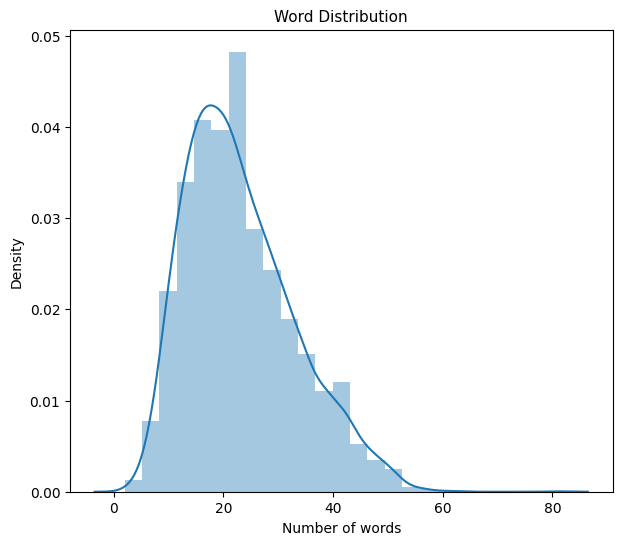

In [8]:
# Plotting of Word distribution in dataset
fig, ax = plt.subplots(figsize=(7,6))

ax.set_title("Word Distribution", fontsize=11);
ax.set_xlabel("Number of words");
sns.distplot(sentence_length_all_data, bins=25);

In [9]:
# Value count for the Sentiment column
df_all_data['Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

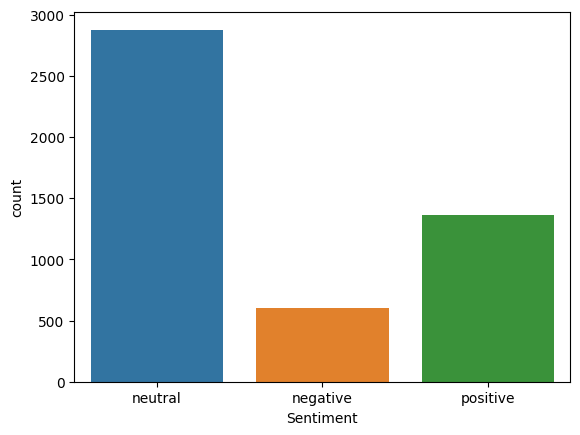

In [10]:
# Plot the Sentiment values
sns.countplot(x='Sentiment', data=df_all_data);

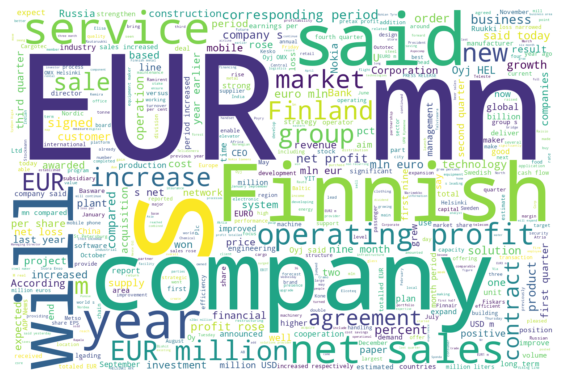

In [11]:
#Showing Positive Sentiments using WordCloud

positive = df_all_data[df_all_data['Sentiment'] == 'positive']
negative = df_all_data[df_all_data['Sentiment'] == 'negative']
neutral = df_all_data[df_all_data['Sentiment'] == 'neutral']

plt.figure(figsize=(7,7))
wordcloud = WordCloud(background_color='white', max_words=500, width=1500, 
                      height=1000).generate(' '.join(positive['Sentence']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

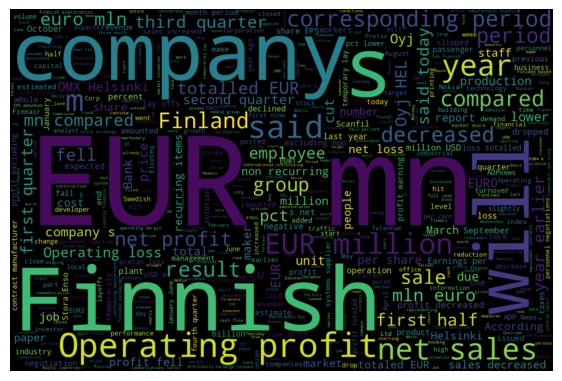

In [12]:
# Showing Negative Sentiments using WordCloud

plt.figure(figsize=(7,7))
wordcloud = WordCloud(background_color='black', max_words=500, width=1500, 
                      height=1000).generate(' '.join(negative['Sentence']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

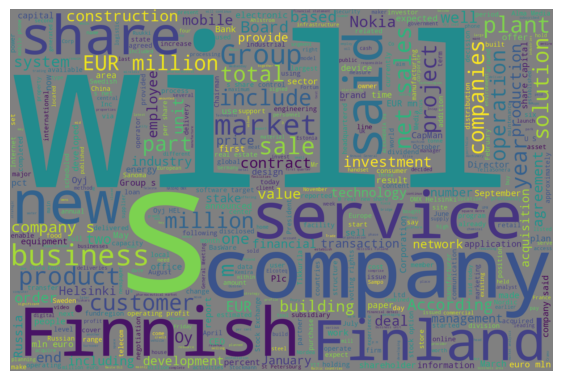

In [13]:
# Showing Neutral Sentiments using WordCloud

plt.figure(figsize=(7,7))
wordcloud = WordCloud(background_color='grey', max_words=500, width=1500, 
                      height=1000).generate(' '.join(neutral['Sentence']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Preprocessing

In [14]:
stop = set(stopwords.words("english"))
print(set(stop))

{'him', 'between', 'hasn', 'but', 'ourselves', 'were', 'most', 'herself', 'nor', 'will', 'didn', 'being', 're', "shan't", 'through', 'against', 'shouldn', 'those', 'who', 'was', 'no', 'just', 'some', 'weren', 'the', 'these', "weren't", 'my', 'on', 'now', 'it', 'y', 'our', 'until', 'have', 'doing', "isn't", 'aren', "you've", 'this', "wasn't", 'wasn', 'where', "wouldn't", 'to', 'yours', 'so', 've', 'few', 'by', 'whom', 'is', 'll', 'isn', 'her', 'she', 'doesn', 'down', 'couldn', "that'll", 'such', 'an', 'yourself', 'me', 'why', 'not', 'at', "don't", "didn't", 'because', 'further', 'under', "couldn't", 'been', 'shan', 'ma', 'your', 'once', 'did', 'into', 'ours', 'other', 'do', 'all', 'as', 'be', 'during', "won't", 'when', "should've", "doesn't", 'you', 'a', 's', 'ain', 'of', 'more', 'about', 'their', "hadn't", 'm', 'itself', "she's", 'over', 'here', "you're", "aren't", 'can', 'o', "mightn't", 'both', 'are', 'in', 'from', 'he', 'them', "mustn't", "hasn't", 'mustn', 'then', 'i', 'up', 'won',

In [15]:
#stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

In [16]:
def data_processing(data):   
    # convert text into lowercase
    data = data.lower()

    # remove new line characters in text
    data = re.sub(r'\n',' ', data)
    
    # remove punctuations from text
    data = re.sub('[%s]' % re.escape(punctuation), "", data)
    
    # remove references and hashtags from text
    data = re.sub("^a-zA-Z0-9$,.", "", data)
    
    # remove multiple spaces from text
    data = re.sub(r'\s+', ' ', data, flags=re.I)
    
    # remove special characters from text
    data = re.sub(r'\W', ' ', data)
    
    # tokenize the words using nltk word tokenizer and remove the stop words using nltk package's english stop words
    data = ' '.join([word for word in word_tokenize(data) if word not in stop])
    
    # lemmatizer using WordNetLemmatizer
    data=' '.join([lemma.lemmatize(word) for word in word_tokenize(data)])

    return data

In [17]:
# Make a copy of data
df_all_data_copy = df_all_data.copy()
df_all_data_copy.Sentence = df_all_data_copy.Sentence.apply(lambda data: data_processing(data))

# Manually encoding categorical target variables Positive == 1,Neutral == 0,Negative == -1
df_all_data_copy['Sentiment'] = np.where(df_all_data_copy['Sentiment']=="positive", 
                                         1, np.where(df_all_data_copy['Sentiment']=="negative", 
                                                     -1, 0))

cleaned_data = {
    'Sentiment':df_all_data_copy['Sentiment'],
    'Sentence':df_all_data_copy.Sentence
}

cleaned_data = pd.DataFrame(cleaned_data)
cleaned_data.head()

,Sentiment,Sentence
0,0,according gran company plan move production ru...
1,0,technopolis plan develop stage area le 100000 ...
2,-1,international electronic industry company elco...
3,1,new production plant company would increase ca...
4,1,according company updated strategy year 200920...


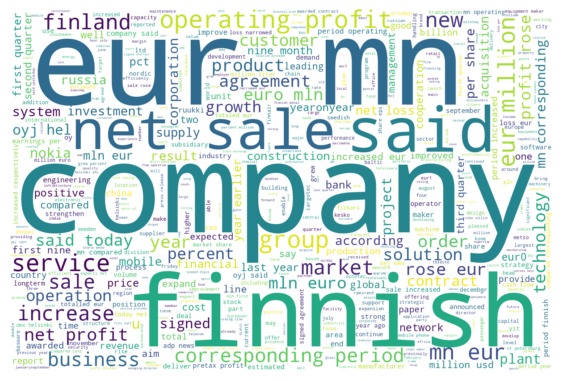

In [18]:
#Showing Positive Sentiments using WordCloud after preprocessing

positive_cleaned = cleaned_data[cleaned_data['Sentiment'] == 1]
negative_cleaned = cleaned_data[cleaned_data['Sentiment'] == -1]
neutral_cleaned = cleaned_data[cleaned_data['Sentiment'] == 0]

plt.figure(figsize=(7,7))
wordcloud = WordCloud(background_color='white', max_words=500, width=1500, 
                      height=1000).generate(' '.join(positive_cleaned['Sentence']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

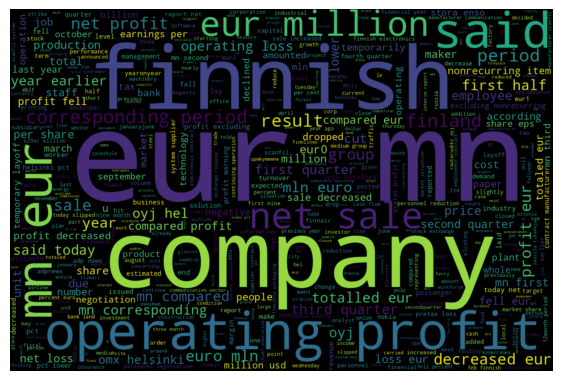

In [19]:
#Showing Negative Sentiments using WordCloud after preprocessing
plt.figure(figsize=(7,7))
wordcloud = WordCloud(background_color='black', max_words=500, width=1500, 
                      height=1000).generate(' '.join(negative_cleaned['Sentence']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

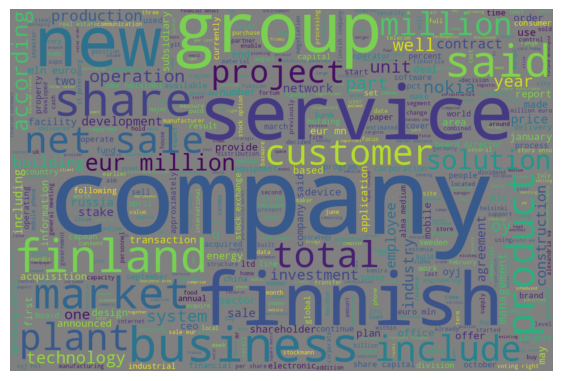

In [20]:
#Showing Neutral Sentiments using WordCloud after preprocessing
plt.figure(figsize=(7,7))
wordcloud = WordCloud(background_color='grey', max_words=500, width=1500, 
                      height=1000).generate(' '.join(neutral_cleaned['Sentence']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
# Checking the minimum, average and maximum words in sentence after pre-processing

sentence_length_cleaned_data = np.array(list(map(len, cleaned_data["Sentence"].str.split(' '))))

print("The average number of words in a sentence is: {}".format(np.mean(sentence_length_cleaned_data)))
print("The minimum number of words in a sentence is: {}".format(min(sentence_length_cleaned_data)))
print("The maximum number of words in a sentence is: {}".format(max(sentence_length_cleaned_data)))

The average number of words in a sentence is: 13.199133305819233
The minimum number of words in a sentence is: 1
The maximum number of words in a sentence is: 47


<ipython-input-22-5e502de2bbb6>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sentence_length_cleaned_data, bins=25);


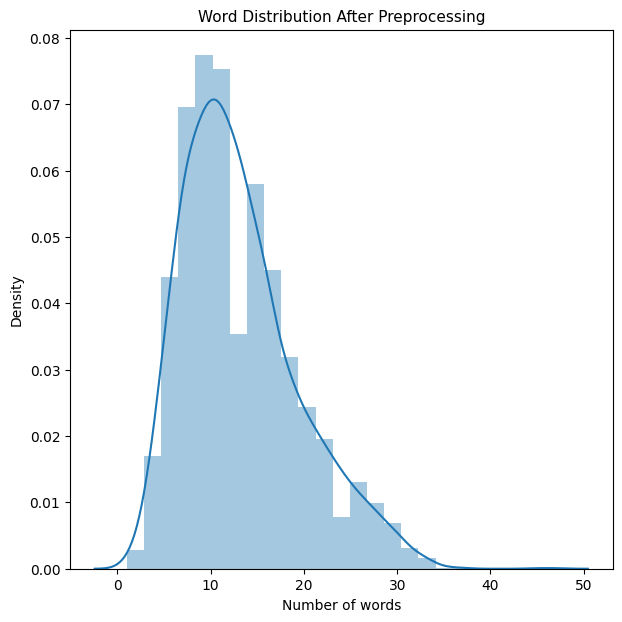

In [22]:
# Plotting of Word distribution in pre-processed dataset
fig, ax = plt.subplots(figsize=(7,7))

ax.set_title("Word Distribution After Preprocessing", fontsize=11);
ax.set_xlabel("Number of words");
sns.distplot(sentence_length_cleaned_data, bins=25);

In [23]:
cleaned_data['Sentiment'].value_counts()

 0    2879
 1    1363
-1     604
Name: Sentiment, dtype: int64

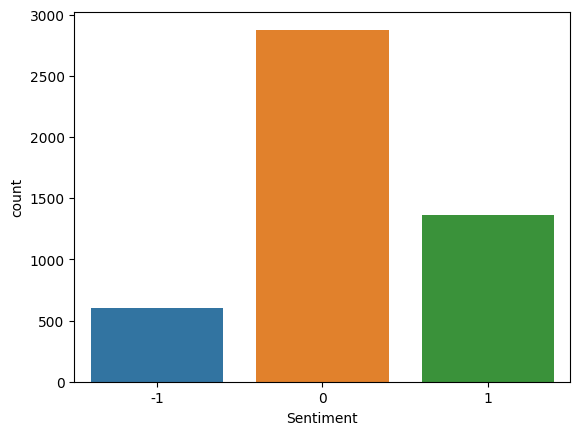

In [24]:
# Plot the Sentiment values
sns.countplot(x='Sentiment', data=cleaned_data);

# Data Preparation

In [25]:
#Data Splitting
train, test = train_test_split(cleaned_data, random_state=42, test_size=0.3)
train['Sentiment'].value_counts()

 0    2032
 1     935
-1     425
Name: Sentiment, dtype: int64

In [26]:
# Function for augmenting data.
aug = naw.SynonymAug()

# Define the data augmentation function 
def augment_text(df,samples=0,pr=0.2,sentiment=None):
    aug.aug_p=pr
    new_sentence=[]
    
    ##selecting the minority class samples
    df_n=df[df['Sentiment']==sentiment].reset_index(drop=True)

    ## data augmentation loop
    for i in tqdm(np.random.randint(0,len(df_n),samples)):
        
            sentence = df_n.iloc[i]['Sentence']
            augmented_sentence = aug.augment(sentence)
            new_sentence.append(augmented_sentence)
    
    ## dataframe
    new=pd.DataFrame({'Sentiment':sentiment,'Sentence':new_sentence})
    df=shuffle(df.append(new).reset_index(drop=True))
    return df

In [27]:
# Data Augumentation to balance train data for Positive and Negative Sentiment

train_aug = train.copy()
train_aug = augment_text(train_aug,samples=1097,sentiment=1)
train_aug = augment_text(train_aug,samples=1607,sentiment=-1)

train_aug['Sentence'] =  train_aug['Sentence'].apply(lambda x: x[0] if isinstance(x, list) else x)

train_aug["Sentiment"].value_counts()

  0%|          | 0/1097 [00:00<?, ?it/s][nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
100%|██████████| 1097/1097 [00:02<00:00, 400.43it/s]
<ipython-input-26-6c20e9d14799>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=shuffle(df.append(new).reset_index(drop=True))
100%|██████████| 1607/1607 [00:02<00:00, 635.61it/s]
<ipython-input-26-6c20e9d14799>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=shuffle(df.append(new).reset_index(drop=True))


-1    2032
 0    2032
 1    2032
Name: Sentiment, dtype: int64

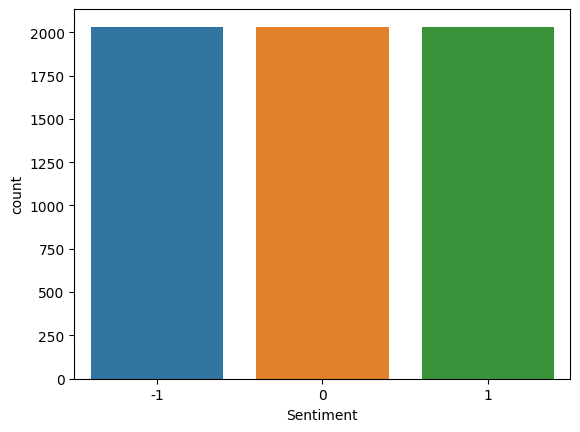

In [28]:
# Plot the Sentiment values for augumented train data
sns.countplot(x='Sentiment', data=train_aug);

In [29]:
# Data Resampling to balance train data for Positive and Negative Sentiment
from sklearn.utils import resample

df_neutral = train[(train['Sentiment']==0)] 
df_negative = train[(train['Sentiment']==-1)]
df_positive = train[(train['Sentiment']==1)]


# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 2032, 
                                 random_state=42)  

df_positive_upsampled = resample(df_positive, 
                                 replace=True,    
                                 n_samples= 2032, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
train_resamp = pd.concat([df_negative_upsampled,df_neutral,df_positive_upsampled])

train_resamp["Sentiment"].value_counts()

-1    2032
 0    2032
 1    2032
Name: Sentiment, dtype: int64

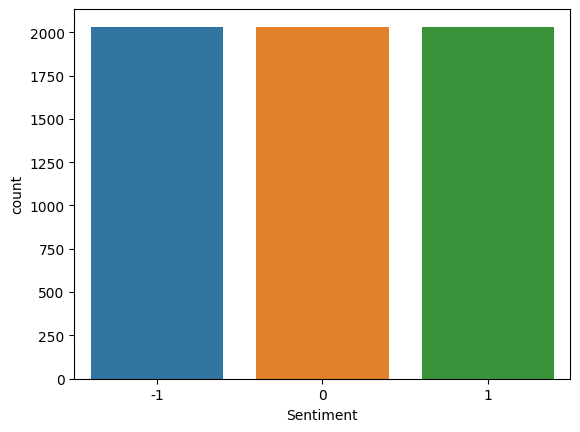

In [30]:
# Plot the Sentiment values for resampled train data
sns.countplot(x='Sentiment', data=train_resamp);

In [31]:
# Split data into train and test sets

# Train without data augmentation
X_train, y_train = train['Sentence'], train['Sentiment']

# Train with data augmentation
X_train_aug, y_train_aug = train_aug['Sentence'], train_aug['Sentiment']

# Train with data Resampling
X_train_resamp, y_train_resamp = train_resamp['Sentence'], train_resamp['Sentiment']

# Test
X_test, y_test = test['Sentence'], test['Sentiment']

In [32]:
# Convert a collection of text documents to a matrix of token counts.

cv = CountVectorizer(stop_words='english')

# Tfidf vectorizer
# Convert a collection of raw documents to a matrix of TF-IDF features.

tfidf_vec = TfidfVectorizer(use_idf=True)

In [33]:
# Transforming non-augumented,upsampled and augumented X_train and X_test using Count vectorizer

# X_train transform
X_train_cv = cv.fit_transform(X_train)
# X_test transform 
X_test_cv = cv.transform(X_test)

# X_train_aug transform 
X_train_aug_cv = cv.fit_transform(X_train_aug)
# X_test_aug transform 
X_test_aug_cv = cv.transform(X_test)

# X_train_resamp transform 
X_train_resamp_cv = cv.fit_transform(X_train_resamp)
# X_test_aug transform 
X_test_resamp_cv = cv.transform(X_test)


print('Shape of Vector (Train CountVec)',X_train_cv.shape)
print('Shape of Vector (Test CountVec)',X_test_cv.shape)
print('Shape of Vector (Train Aug)',X_train_aug_cv.shape)
print('Shape of Vector (Test Aug)',X_test_aug_cv.shape)
print('Shape of Vector (Train Resamp)',X_train_resamp_cv.shape)
print('Shape of Vector (Test Resamp)',X_test_resamp_cv.shape)

Shape of Vector (Train CountVec) (3392, 8307)
Shape of Vector (Test CountVec) (1454, 8307)
Shape of Vector (Train Aug) (6096, 9578)
Shape of Vector (Test Aug) (1454, 9578)
Shape of Vector (Train Resamp) (6096, 8148)
Shape of Vector (Test Resamp) (1454, 8148)


In [34]:
# Transforming non-augumented,upsampled and augumented X_train and X_test using TFIDF vectorizer

# X_train transform
X_train_tfidf = tfidf_vec.fit_transform(X_train)
# X_test transform
X_test_tfidf = tfidf_vec.transform(X_test)

# X_train_aug transform
X_train_aug_tfidf = tfidf_vec.fit_transform(X_train_aug)
# X_test_aug transform
X_test_aug_tfidf = tfidf_vec.transform(X_test)

# X_train_resamp transform
X_train_resamp_tfidf = tfidf_vec.fit_transform(X_train_resamp)
# X_test_resamp transform
X_test_resamp_tfidf = tfidf_vec.transform(X_test)

print('vShape of Vector (train)',X_train_tfidf.shape)
print('Shape of Vector (test)',X_test_tfidf.shape)
print('Shape of Vector (train)',X_train_aug_tfidf.shape)
print('Shape of Vector (test)',X_test_aug_tfidf.shape)
print('Shape of Vector (train)',X_train_resamp_tfidf.shape)
print('Shape of Vector (test)',X_test_resamp_tfidf.shape)

vShape of Vector (train) (3392, 8444)
Shape of Vector (test) (1454, 8444)
Shape of Vector (train) (6096, 9759)
Shape of Vector (test) (1454, 9759)
Shape of Vector (train) (6096, 8285)
Shape of Vector (test) (1454, 8285)


# Model Definition and Training

In [ ]:
# Function to plot the confusion matrix for test set
# This function also prints the precision, recall and f1-score and accuracy, both for the train and test sets
model_used = []
vectorization_type = []
training_accuracy = []
testing_accuracy = []
balancing = []

def classification_results(model, model_name, X_train, y_train, X_test, y_test, parameters, vectorization):  

    # Getting the predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)          
    
    # Printing the model's name
    print(f'RESULTS of {model_name} \n') 
    print(f'Vectorization: {vectorization} \n') 
    
    # Computing the accuracy in the TRAIN SET with cross validation in 5 folds
    accuracy = model_selection.cross_val_score(model, X_train, y_train, cv = 5).mean()
    # Computing the accuracy in the TEST SET
    accuracy_test  =  accuracy_score(y_test,y_test_pred)

    # Storing the results
    model_used.append(model_name)
    vectorization_type.append(vectorization)
    training_accuracy.append(accuracy)
    testing_accuracy.append(accuracy_test)

    # Classification Report - train
    print('Results in the TRAIN set:')
    print(classification_report(y_train,y_train_pred))

    # Classification Report - test
    print('Results in the TEST set:')
    print(classification_report(y_test,y_test_pred))

    # Confusion Matrix in the TEST SET
    plt.figure(figsize=(8,8))
    sns.heatmap(confusion_matrix(y_test,y_test_pred), annot = True,fmt = "d", cmap="viridis")
    # labels, title and ticks
    plt.xlabel('Predicted labels');
    plt.ylabel('True labels'); 
    plt.title('Confusion Matrix'); 
    plt.xticks([0.5,1.5,2.5], ['negative', 'neutral', 'positive']); 
    plt.yticks([0.5,1.5,2.5], ['negative', 'neutral', 'positive']);

    return y_train_pred, y_test_pred;

In [ ]:
def model_evaluation(model, model_name, X_train, y_train, X_test, y_test, parameters, vectorization='count vectorization'):

    # Initiating GridSearch with 5 folds
    grid = GridSearchCV(model, parameters, cv=5, scoring='accuracy', return_train_score=True, verbose=0 ,n_jobs=-1)

    # Print model's name
    print(f'Model: {model_name} \n') 
    
    if model_name in ('LogisticRegression'):
        best_model = model.fit(X_train, y_train)
        
    else:
        grid.fit(X_train, y_train)
        # Best model in the Grid Search
        best_model = grid.best_estimator_
    
        # Print out best parameters
        print('Best Parameters: \n', grid.best_params_)
   
    # Get classification results 
    y_train_pred, y_test_pred = classification_results(best_model, model_name, X_train, y_train, X_test, y_test, parameters, vectorization) 

    return best_model, y_train_pred, y_test_pred;

Model: LogisticRegression 

RESULTS of LogisticRegression 

Vectorization: count vectorization 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       0.99      0.98      0.98       425
           0       0.99      1.00      0.99      2032
           1       1.00      0.98      0.99       935

    accuracy                           0.99      3392
   macro avg       0.99      0.99      0.99      3392
weighted avg       0.99      0.99      0.99      3392

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.72      0.52      0.60       179
           0       0.76      0.89      0.82       847
           1       0.71      0.55      0.62       428

    accuracy                           0.74      1454
   macro avg       0.73      0.65      0.68      1454
weighted avg       0.74      0.74      0.73      1454



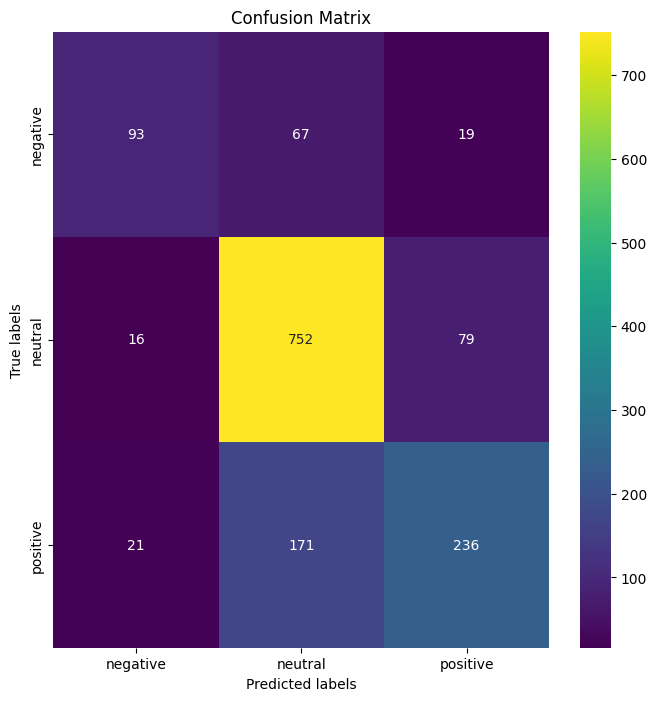

In [ ]:
# MODEL: Logistic Regression(CountVectorized) without Data augmentation and Resampling

model = LogisticRegression(random_state=42)

model_name = 'LogisticRegression'

parameters = []

LR_cv, y_train_pred, y_test_pred = model_evaluation(model=model, X_train=X_train_cv, X_test=X_test_cv, model_name=model_name, y_train=y_train, y_test=y_test, parameters=parameters)
balancing.append("without data augmentation and resampling")

Model: LogisticRegression 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS of LogisticRegression 

Vectorization: count vectorization 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      2032
           0       1.00      0.99      0.99      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.63      0.65      0.64       179
           0       0.78      0.83      0.81       847
           1       0.66      0.57      0.61       428

    accuracy                           0.73      1454
   macro avg       0.69      0.68      0.68      1454
weighted avg       0.73      0.73      0.73      1454



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


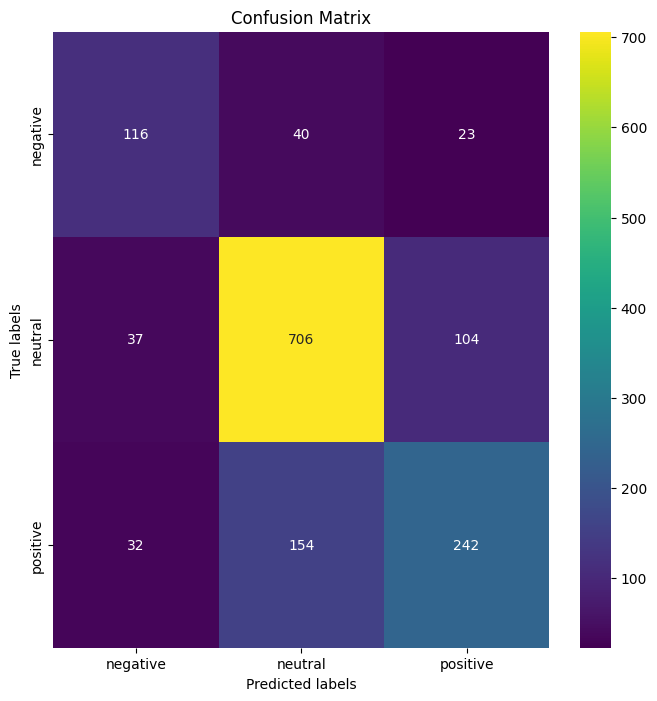

In [ ]:
# MODEL: Logistic Regression(CountVectorized) with Data augmentation

model = LogisticRegression(random_state=42)

model_name = 'LogisticRegression'

parameters = []

LR_aug_cv, y_train_pred, y_test_pred = model_evaluation(model=model, X_train=X_train_aug_cv, X_test=X_test_aug_cv, model_name=model_name, y_train=y_train_aug, y_test=y_test, parameters=parameters)
balancing.append("with data augmentation")

Model: LogisticRegression 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS of LogisticRegression 

Vectorization: count vectorization 



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2032
           0       1.00      0.99      0.99      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.64      0.63      0.63       179
           0       0.77      0.85      0.81       847
           1       0.66      0.54      0.60       428

    accuracy                           0.73      1454
   macro avg       0.69      0.67      0.68      1454
weighted avg       0.72      0.73      0.72      1454



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


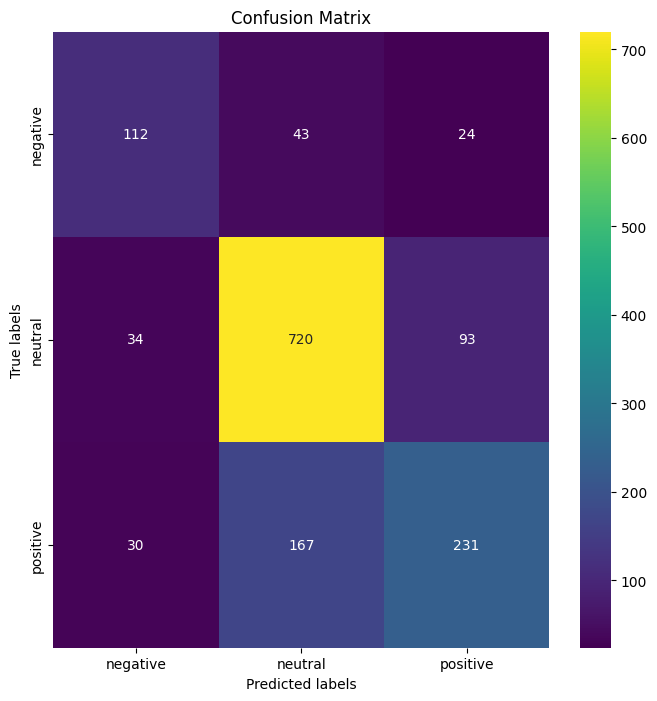

In [ ]:
# MODEL: Logistic Regression(CountVectorized) with Data Resampling

model = LogisticRegression(random_state=42)

model_name = 'LogisticRegression'

parameters = []

LR_resamp_cv, y_train_pred, y_test_pred = model_evaluation(model=model, X_train=X_train_resamp_cv, X_test=X_test_resamp_cv, model_name=model_name, y_train=y_train_resamp, y_test=y_test, parameters=parameters)
balancing.append("with data resampling")

Model: LogisticRegression 

RESULTS of LogisticRegression 

Vectorization: TF-IDF 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       0.95      0.55      0.69       425
           0       0.82      0.99      0.90      2032
           1       0.94      0.70      0.80       935

    accuracy                           0.86      3392
   macro avg       0.90      0.75      0.80      3392
weighted avg       0.87      0.86      0.85      3392

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.76      0.39      0.51       179
           0       0.72      0.94      0.81       847
           1       0.74      0.45      0.56       428

    accuracy                           0.72      1454
   macro avg       0.74      0.59      0.63      1454
weighted avg       0.73      0.72      0.70      1454



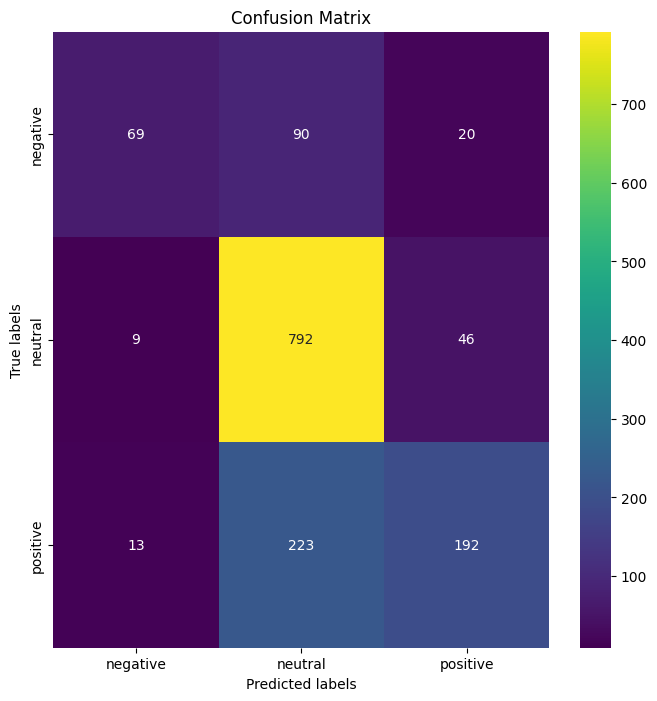

In [ ]:
# MODEL: Logistic Regression(TF-IDF) without Data augmentation and Resampling

model = LogisticRegression(random_state=42)

model_name = 'LogisticRegression'

parameters = []

LR_tfidf, y_train_pred, y_test_pred = model_evaluation(vectorization='TF-IDF', X_train=X_train_tfidf, X_test=X_test_tfidf, y_train=y_train,y_test=y_test, model=model, model_name=model_name, parameters=parameters)
balancing.append("without data augmentation and resampling")

Model: LogisticRegression 

RESULTS of LogisticRegression 

Vectorization: TF-IDF 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       0.96      0.99      0.97      2032
           0       0.97      0.95      0.96      2032
           1       0.97      0.95      0.96      2032

    accuracy                           0.96      6096
   macro avg       0.96      0.96      0.96      6096
weighted avg       0.96      0.96      0.96      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.56      0.68      0.61       179
           0       0.79      0.81      0.80       847
           1       0.63      0.55      0.59       428

    accuracy                           0.72      1454
   macro avg       0.66      0.68      0.67      1454
weighted avg       0.72      0.72      0.71      1454



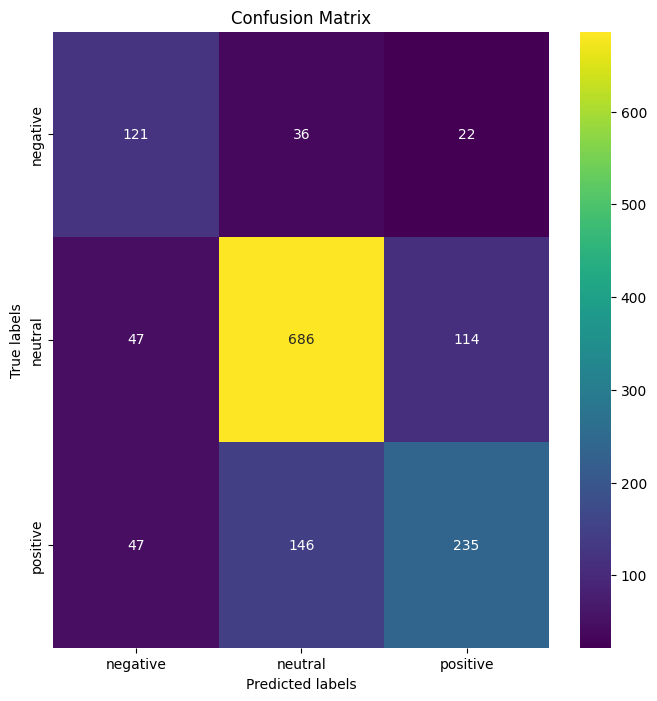

In [ ]:
# MODEL: Logistic Regression(TF-IDF) with Data augmentation

model = LogisticRegression(random_state=42)

model_name = 'LogisticRegression'

parameters = []

LR_aug_tfidf, y_train_pred, y_test_pred = model_evaluation(vectorization='TF-IDF', X_train=X_train_aug_tfidf, X_test=X_test_aug_tfidf, y_train=y_train_aug,y_test=y_test, model=model, model_name=model_name, parameters=parameters)
balancing.append("with data augmentation")

Model: LogisticRegression 

RESULTS of LogisticRegression 

Vectorization: TF-IDF 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       0.96      0.99      0.98      2032
           0       0.96      0.96      0.96      2032
           1       0.97      0.95      0.96      2032

    accuracy                           0.97      6096
   macro avg       0.97      0.97      0.97      6096
weighted avg       0.97      0.97      0.97      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.56      0.64      0.60       179
           0       0.78      0.83      0.81       847
           1       0.66      0.54      0.60       428

    accuracy                           0.72      1454
   macro avg       0.67      0.67      0.67      1454
weighted avg       0.72      0.72      0.72      1454



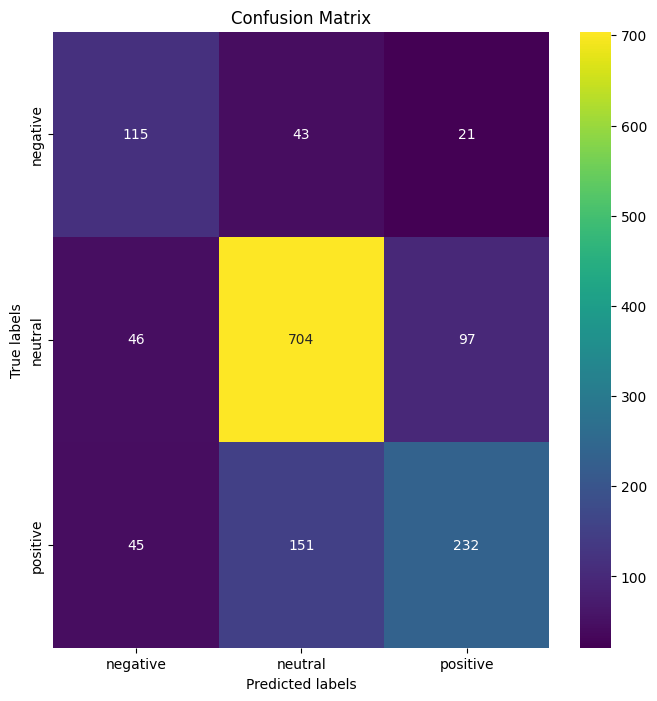

In [ ]:
# MODEL: Logistic Regression(TF-IDF) with Data resampling

model = LogisticRegression(random_state=42)

model_name = 'LogisticRegression'

parameters = []

LR_resamp_tfidf, y_train_pred, y_test_pred = model_evaluation(vectorization='TF-IDF', X_train=X_train_resamp_tfidf, X_test=X_test_resamp_tfidf, y_train=y_train_resamp,y_test=y_test, model=model, model_name=model_name, parameters=parameters)
balancing.append("with data resampling")

##Random Forest Classifier

Model: RandomForest 

Best Parameters: 
 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
RESULTS of RandomForest 

Vectorization: count vectorization 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       425
           0       1.00      1.00      1.00      2032
           1       0.99      0.99      0.99       935

    accuracy                           0.99      3392
   macro avg       0.99      0.99      0.99      3392
weighted avg       0.99      0.99      0.99      3392

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.73      0.45      0.56       179
           0       0.75      0.92      0.83       847
           1       0.74      0.52      0.61       428

    accuracy                           0.75      1454
   macro avg       0.74      0.63      0.67      1454
weighted avg       0.75  

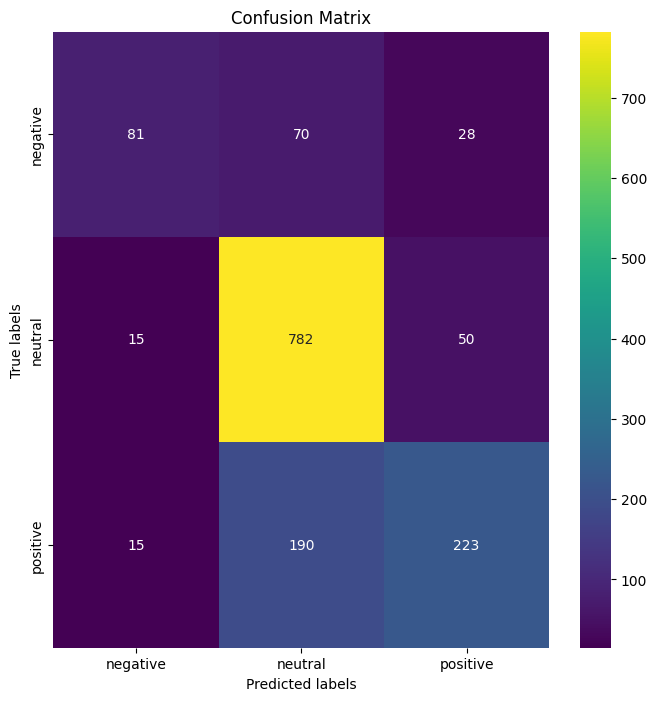

In [ ]:
# MODEL: Random Forest(CountVectorized) without Data augmentation and Resampling

model = RandomForestClassifier()

model_name = 'RandomForest'

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [50, 100],
             'min_samples_split': [5, 10],
             'min_samples_leaf': [1, 2],
             'bootstrap': [True, False]}

RF_cv, y_train_pred, y_test_pred = model_evaluation(X_train=X_train_cv, y_train=y_train, X_test=X_test_cv, y_test=y_test, model=model, model_name=model_name, parameters=parameters)
balancing.append("without data augmentation and Resampling")

Model: RandomForest 

Best Parameters: 
 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RESULTS of RandomForest 

Vectorization: count vectorization 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2032
           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.61      0.59      0.60       179
           0       0.77      0.89      0.82       847
           1       0.72      0.51      0.60       428

    accuracy                           0.74      1454
   macro avg       0.70      0.66      0.67      1454
weighted avg       0.73  

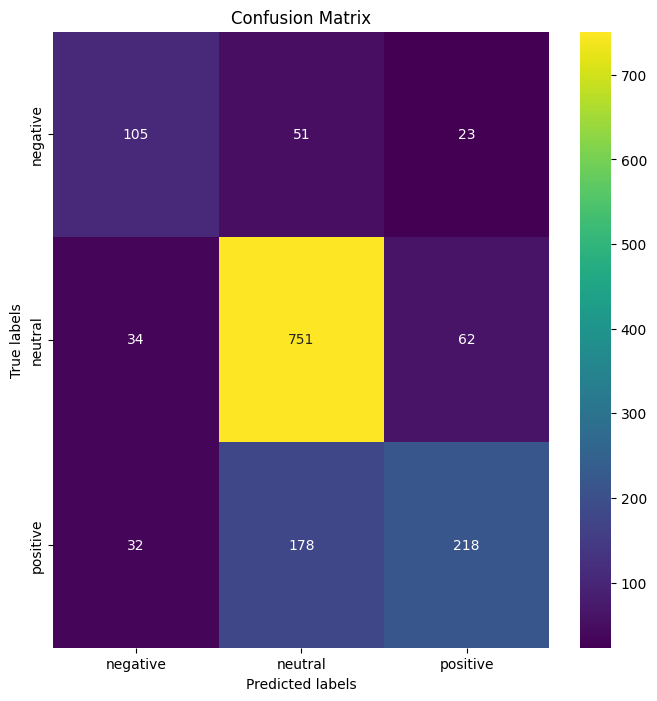

In [ ]:
# MODEL: Random Forest(CountVectorized) with Data augmentation

model = RandomForestClassifier()

model_name = 'RandomForest'

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [50, 100],
             'min_samples_split': [5, 10],
             'min_samples_leaf': [1, 2],
             'bootstrap': [True, False]}

RF_aug_cv, y_train_pred, y_test_pred = model_evaluation(X_train=X_train_aug_cv, y_train=y_train_aug, X_test=X_test_aug_cv, y_test=y_test, model=model, model_name=model_name, parameters=parameters)
balancing.append("with data augmentation")

Model: RandomForest 

Best Parameters: 
 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RESULTS of RandomForest 

Vectorization: count vectorization 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2032
           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.71      0.48      0.57       179
           0       0.73      0.94      0.82       847
           1       0.80      0.45      0.58       428

    accuracy                           0.74      1454
   macro avg       0.75      0.62      0.66      1454
weighted avg       0.75  

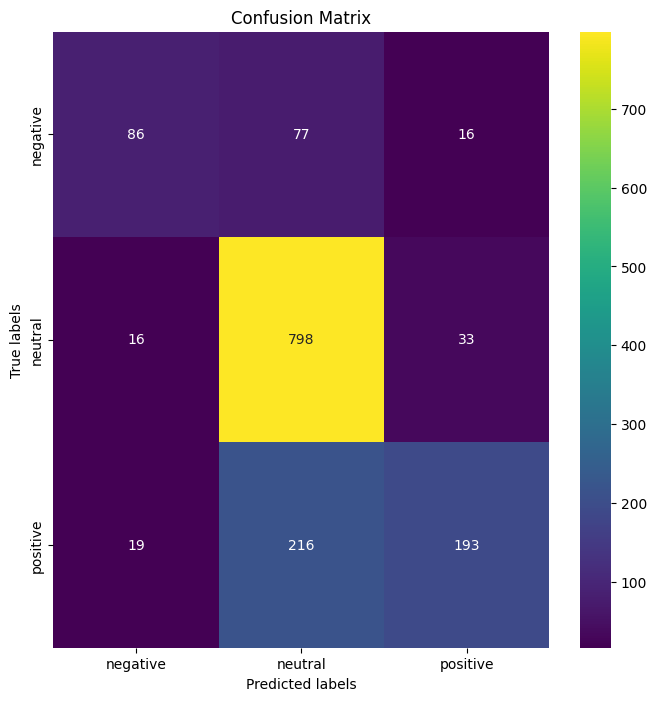

In [ ]:
# MODEL: Random Forest(CountVectorized) with Data Resampling

model = RandomForestClassifier()

model_name = 'RandomForest'

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [50, 100],
             'min_samples_split': [5, 10],
             'min_samples_leaf': [1, 2],
             'bootstrap': [True, False]}

RF_resamp_cv, y_train_pred, y_test_pred = model_evaluation(X_train=X_train_resamp_cv, y_train=y_train_resamp, X_test=X_test_resamp_cv, y_test=y_test, model=model, model_name=model_name, parameters=parameters)
balancing.append("with data resampling")

Model: RandomForest 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Parameters: 
 {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
RESULTS of RandomForest 

Vectorization: TF-IDF 



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00       935

    accuracy                           1.00      3392
   macro avg       1.00      1.00      1.00      3392
weighted avg       1.00      1.00      1.00      3392

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.69      0.42      0.53       179
           0       0.75      0.90      0.82       847
           1       0.71      0.53      0.60       428

    accuracy                           0.73      1454
   macro avg       0.71      0.62      0.65      1454
weighted avg       0.73      0.73      0.72      1454



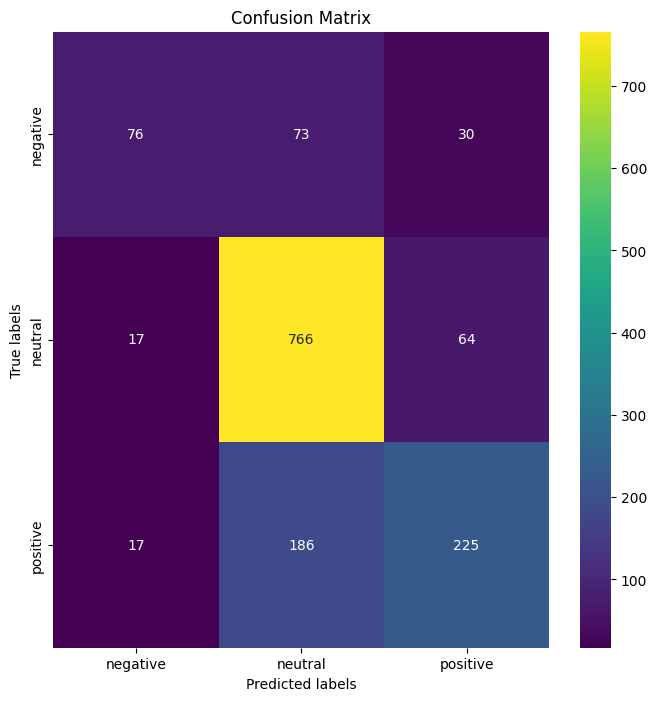

In [ ]:
# MODEL: Random Forest(TF-IDF) without Data augmentation and Resampling

model = RandomForestClassifier()

model_name = 'RandomForest'

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [50, 100],
             'min_samples_split': [5, 10],
             'min_samples_leaf': [1, 2],
             'bootstrap': [True, False]}

RF_tfidf, y_train_pred, y_test_pred = model_evaluation(vectorization='TF-IDF', X_train=X_train_tfidf, y_train=y_train, X_test=X_test_tfidf, y_test=y_test, model=model, model_name=model_name, parameters=parameters)
balancing.append("without data augmentation and ressampling")

Model: RandomForest 

Best Parameters: 
 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
RESULTS of RandomForest 

Vectorization: TF-IDF 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2032
           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.60      0.60      0.60       179
           0       0.77      0.88      0.82       847
           1       0.71      0.52      0.60       428

    accuracy                           0.74      1454
   macro avg       0.69      0.67      0.68      1454
weighted avg       0.73      0.74      

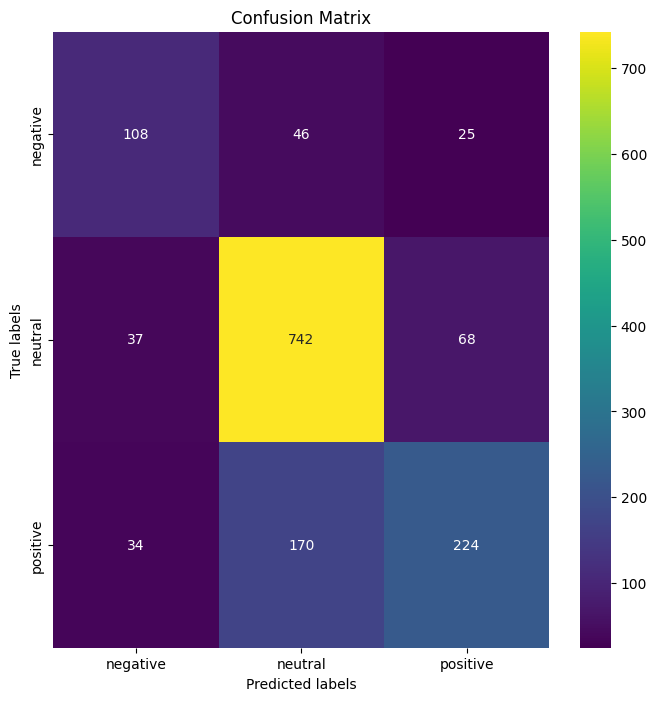

In [ ]:
# MODEL: Random Forest(TF-IDF) with Data augmentation

model = RandomForestClassifier()

model_name = 'RandomForest'

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [50, 100],
             'min_samples_split': [5, 10],
             'min_samples_leaf': [1, 2],
             'bootstrap': [True, False]}

RF_aug_tfidf, y_train_pred, y_test_pred = model_evaluation(vectorization='TF-IDF', X_train=X_train_aug_tfidf, y_train=y_train_aug, X_test=X_test_aug_tfidf, y_test=y_test, model=model, model_name=model_name, parameters=parameters)
balancing.append("with data augmentation")

Model: RandomForest 

Best Parameters: 
 {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
RESULTS of RandomForest 

Vectorization: TF-IDF 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2032
           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.62      0.42      0.50       179
           0       0.73      0.94      0.82       847
           1       0.79      0.43      0.56       428

    accuracy                           0.73      1454
   macro avg       0.71      0.60      0.63      1454
weighted avg       0.73      0.73      

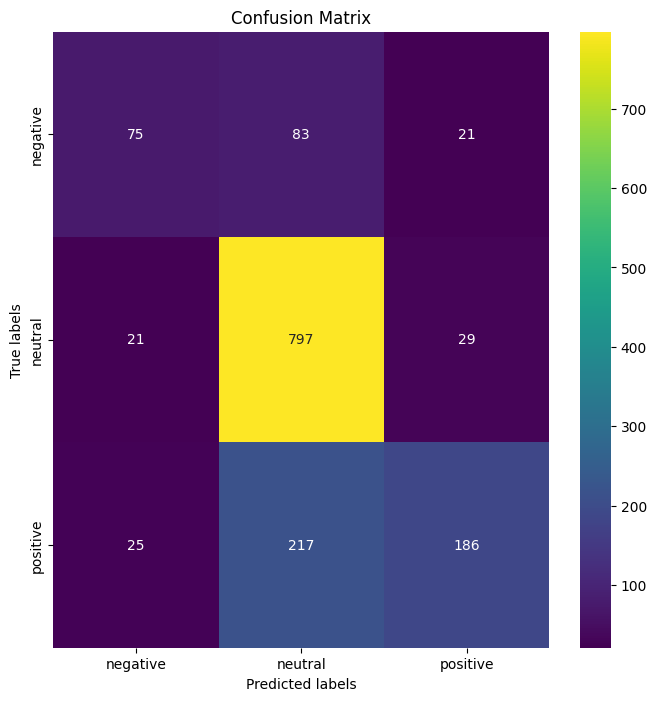

In [ ]:
# MODEL: Random Forest(TF-IDF) with Data Resampling

model = RandomForestClassifier()

model_name = 'RandomForest'

parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [50, 100],
             'min_samples_split': [5, 10],
             'min_samples_leaf': [1, 2],
             'bootstrap': [True, False]}

RF_resamp_tfidf, y_train_pred, y_test_pred = model_evaluation(vectorization='TF-IDF', X_train=X_train_resamp_tfidf, y_train=y_train_resamp, X_test=X_test_resamp_tfidf, y_test=y_test, model=model, model_name=model_name, parameters=parameters)
balancing.append("with data resampling")

## Support Vector Machine

Model: SVC 

Best Parameters: 
 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
RESULTS of SVC 

Vectorization: count vectorization 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       0.95      0.91      0.93       425
           0       0.95      0.99      0.97      2032
           1       0.99      0.91      0.95       935

    accuracy                           0.96      3392
   macro avg       0.96      0.94      0.95      3392
weighted avg       0.96      0.96      0.96      3392

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.71      0.52      0.60       179
           0       0.75      0.90      0.82       847
           1       0.74      0.54      0.62       428

    accuracy                           0.75      1454
   macro avg       0.73      0.65      0.68      1454
weighted avg       0.74      0.75      0.73      1454



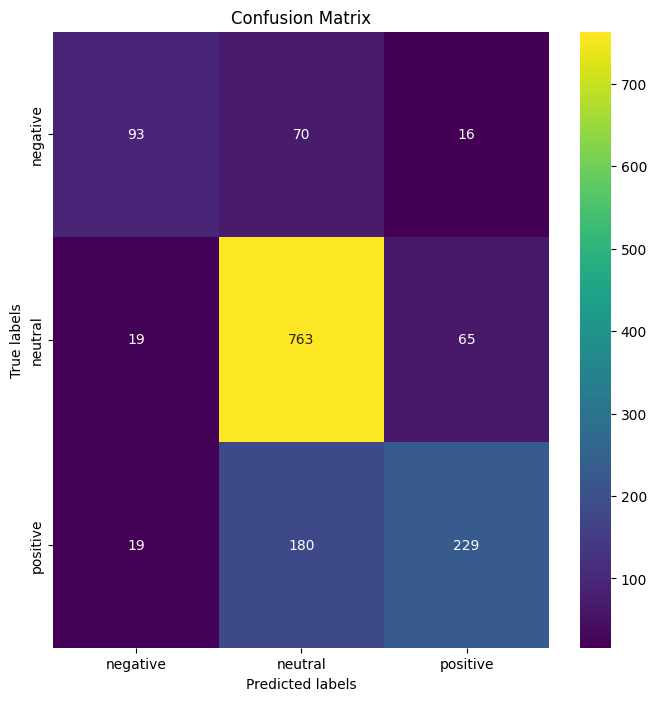

In [ ]:
# MODEL: SVC(CountVectorized) without Data Augmentation and Resampling

model = SVC()

model_name = 'SVC'

parameters = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

SVC_cv, y_train_pred, y_test_pred = model_evaluation(model=model, X_train=X_train_cv, X_test=X_test_cv, model_name=model_name, y_train=y_train, y_test=y_test, parameters=parameters)
balancing.append("without data augmentation and resampling")

Model: SVC 

Best Parameters: 
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
RESULTS of SVC 

Vectorization: count vectorization 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2032
           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.67      0.50      0.57       179
           0       0.74      0.90      0.81       847
           1       0.71      0.48      0.57       428

    accuracy                           0.73      1454
   macro avg       0.71      0.63      0.65      1454
weighted avg       0.72      0.73      0.71      1454



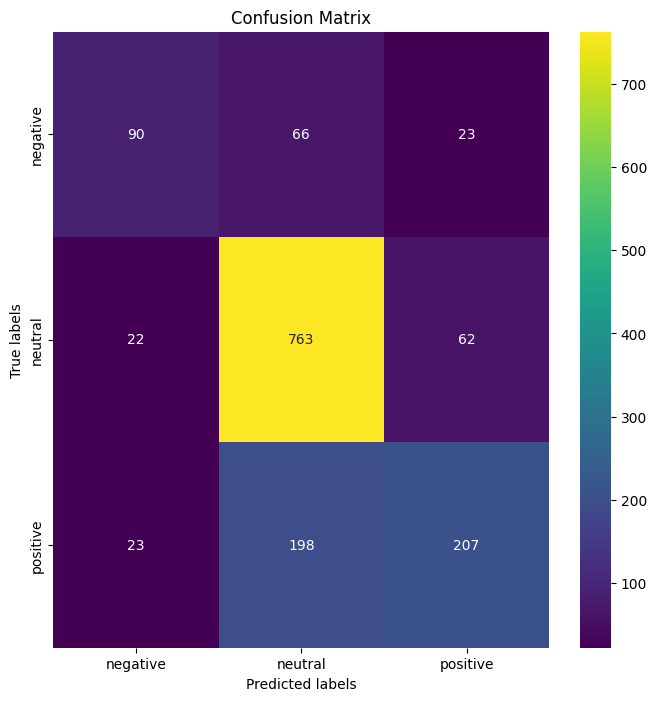

In [ ]:
# MODEL: SVC(CountVectorized) with Data Augmentation

model = SVC()

model_name = 'SVC'

parameters = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

SVC_aug_cv, y_train_pred, y_test_pred = model_evaluation(model=model, X_train=X_train_aug_cv, X_test=X_test_aug_cv, model_name=model_name, y_train=y_train_aug, y_test=y_test, parameters=parameters)
balancing.append("with data augmentation")

Model: SVC 

Best Parameters: 
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
RESULTS of SVC 

Vectorization: count vectorization 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2032
           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.71      0.40      0.51       179
           0       0.70      0.94      0.81       847
           1       0.75      0.39      0.51       428

    accuracy                           0.71      1454
   macro avg       0.72      0.58      0.61      1454
weighted avg       0.72      0.71      0.68      1454



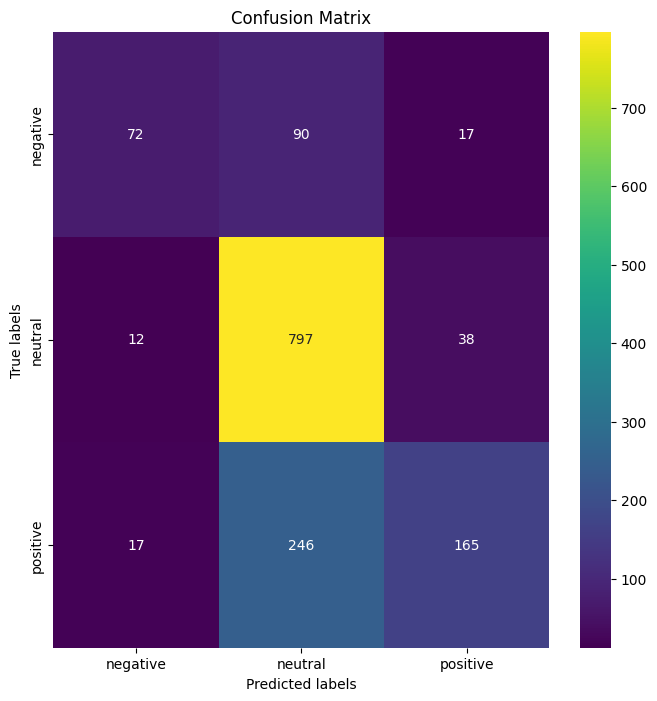

In [ ]:
# MODEL: SVC(CountVectorized) with Data Resampling

model = SVC()

model_name = 'SVC'

parameters = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

SVC_resamp_cv, y_train_pred, y_test_pred = model_evaluation(model=model, X_train=X_train_resamp_cv, X_test=X_test_resamp_cv, model_name=model_name, y_train=y_train_resamp, y_test=y_test, parameters=parameters)
balancing.append("with data resampling")

Model: SVC 

Best Parameters: 
 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
RESULTS of SVC 

Vectorization: TF-IDF 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       0.98      0.97      0.98       425
           0       0.99      0.99      0.99      2032
           1       0.98      0.97      0.98       935

    accuracy                           0.99      3392
   macro avg       0.98      0.98      0.98      3392
weighted avg       0.99      0.99      0.99      3392

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.67      0.55      0.61       179
           0       0.77      0.87      0.82       847
           1       0.70      0.58      0.64       428

    accuracy                           0.75      1454
   macro avg       0.72      0.67      0.69      1454
weighted avg       0.74      0.75      0.74      1454



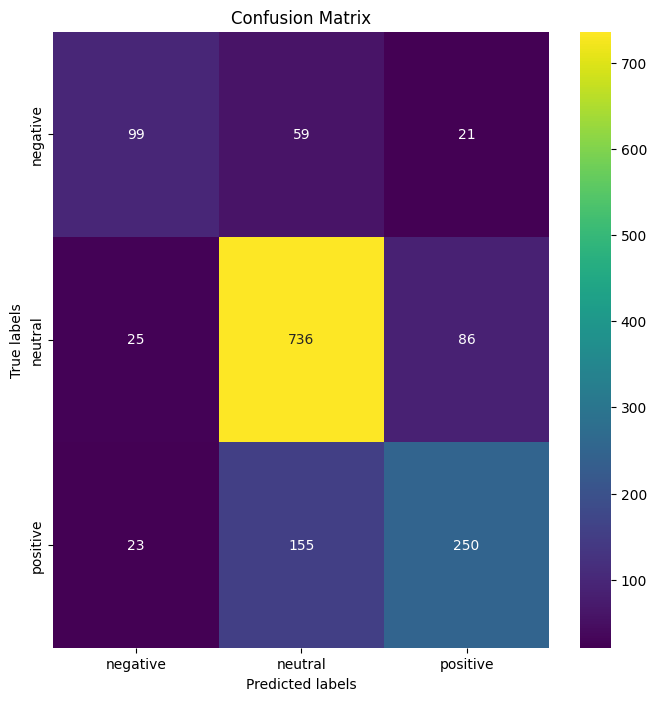

In [ ]:
# MODEL: SVC(TF-IDF) without Data Augmentation and Resampling

model = SVC()

model_name = 'SVC'

parameters = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

SVC_tfidf, y_train_pred, y_test_pred = model_evaluation(model=model, vectorization='TF-IDF', X_train=X_train_tfidf, X_test=X_test_tfidf, model_name=model_name, y_train=y_train, y_test=y_test, parameters=parameters)
balancing.append("without data augmentation and resampling")

Model: SVC 

Best Parameters: 
 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
RESULTS of SVC 

Vectorization: TF-IDF 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2032
           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.68      0.53      0.60       179
           0       0.75      0.89      0.82       847
           1       0.70      0.51      0.59       428

    accuracy                           0.74      1454
   macro avg       0.71      0.64      0.67      1454
weighted avg       0.73      0.74      0.72      1454



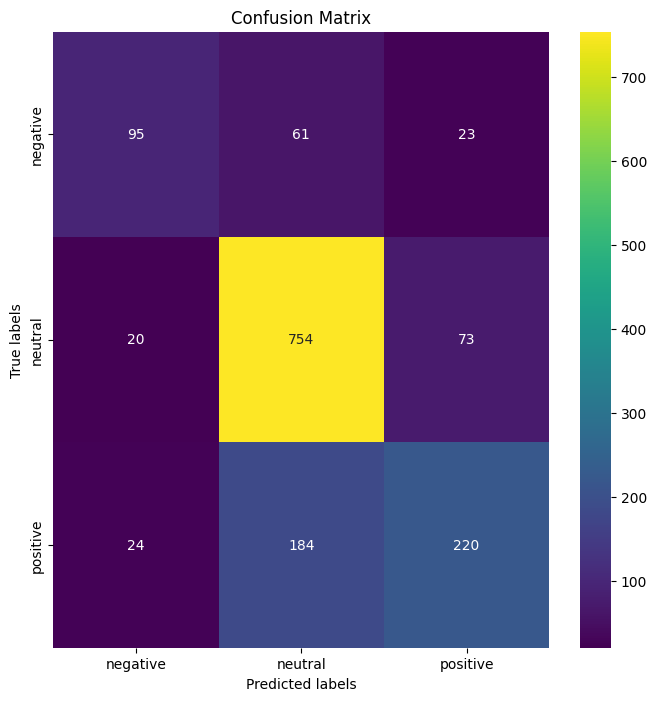

In [ ]:
# MODEL: SVC(TF-IDF) with Data Augmentation

model = SVC()

model_name = 'SVC'

parameters = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

SVC_aug_tfidf, y_train_pred, y_test_pred = model_evaluation(model=model, vectorization='TF-IDF', X_train=X_train_aug_tfidf, X_test=X_test_aug_tfidf, model_name=model_name, y_train=y_train_aug, y_test=y_test, parameters=parameters)
balancing.append("with data augmentation")

Model: SVC 

Best Parameters: 
 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
RESULTS of SVC 

Vectorization: TF-IDF 

Results in the TRAIN set:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      2032
           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      2032

    accuracy                           1.00      6096
   macro avg       1.00      1.00      1.00      6096
weighted avg       1.00      1.00      1.00      6096

Results in the TEST set:
              precision    recall  f1-score   support

          -1       0.70      0.40      0.51       179
           0       0.72      0.94      0.82       847
           1       0.77      0.45      0.56       428

    accuracy                           0.73      1454
   macro avg       0.73      0.60      0.63      1454
weighted avg       0.73      0.73      0.70      1454



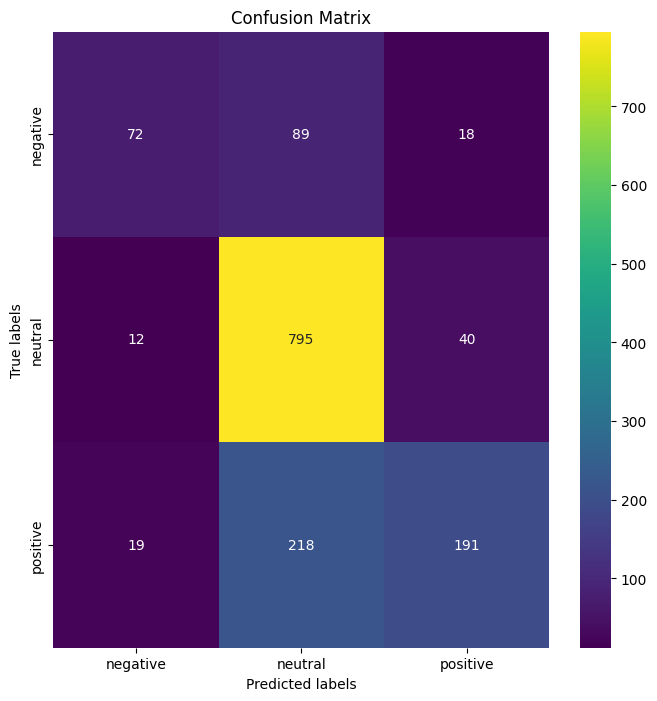

In [ ]:
# MODEL: SVC(TF-IDF) with Data Resampling

model = SVC()

model_name = 'SVC'

parameters = {'C': [0.1,1, 10], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

SVC_resamp_tfidf, y_train_pred, y_test_pred = model_evaluation(model=model, vectorization='TF-IDF', X_train=X_train_resamp_tfidf, X_test=X_test_resamp_tfidf, model_name=model_name, y_train=y_train_resamp, y_test=y_test, parameters=parameters)
balancing.append("with data resampling")

In [ ]:
# dictionary with list object in values
model_results = {
    'model' : model_used,
    'vectorization' : vectorization_type,
    'balancing' : balancing,
    'accuracy_train' : training_accuracy,
    'accuracy_test' : testing_accuracy
}

results = pd.DataFrame(model_results, columns = ['model', 'vectorization', 'balancing', 'accuracy_train', 'accuracy_test'])
results.head(22)

,model,vectorization,balancing,accuracy_train,accuracy_test
0,LogisticRegression,count vectorization,without data augmentation and resampling,0.739980,0.743466
1,LogisticRegression,count vectorization,with data augmentation,0.876147,0.731774
2,LogisticRegression,count vectorization,with data resampling,0.913222,0.731087
3,LogisticRegression,TF-IDF,without data augmentation and resampling,0.709320,0.724209
4,LogisticRegression,TF-IDF,with data augmentation,0.846128,0.716644
5,LogisticRegression,TF-IDF,with data resampling,0.887141,0.722834
6,RandomForest,count vectorization,without data augmentation and Resampling,0.735554,0.746905
7,RandomForest,count vectorization,with data augmentation,0.903214,0.738652
8,RandomForest,count vectorization,with data resampling,0.941602,0.740715
9,RandomForest,TF-IDF,without data augmentation and ressampling,0.732014,0.733838


# Deeplearning Approach to Sentiment Analysis for Financial News

## Recurrent Neural Network - RNN

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import SimpleRNN, GRU
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense

In [74]:
#Model Parameters
epochs = 10
batch_size = 64
MAX_NB_WORDS = 50000
EMBEDDING_DIM = 100
MAX_SEQUENCE_LENGTH = 250

In [37]:
# Converting data into tokens
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(cleaned_data['Sentence'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8473 unique tokens.


In [ ]:
X_deep = tokenizer.texts_to_sequences(cleaned_data['Sentence'].values)
X_deep = pad_sequences(X_deep, maxlen=MAX_SEQUENCE_LENGTH)
y_deep = pd.get_dummies(cleaned_data['Sentiment']).values

In [58]:
# Split data into train and test sets for deep neural network model
X_train_deep, X_test_deep, y_train_deep, y_test_deep = train_test_split(X_deep,y_deep, test_size = 0.3, random_state = 42)

In [75]:
# Training RNN Model
rnn = Sequential()
rnn.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_deep.shape[1]))
rnn.add(SpatialDropout1D(0.2))
rnn.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
rnn.add(Dense(3, activation='softmax'))
rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn_model = rnn.fit(X_train_deep, y_train_deep, epochs=epochs, batch_size=batch_size)

Epoch 1/10
53/53 [==============================] - 19s 307ms/step - loss: 1.0134 - accuracy: 0.5254
Epoch 2/10
53/53 [==============================] - 19s 351ms/step - loss: 0.8957 - accuracy: 0.6050
Epoch 3/10
53/53 [==============================] - 15s 289ms/step - loss: 0.7636 - accuracy: 0.6689
Epoch 4/10
53/53 [==============================] - 20s 371ms/step - loss: 0.5976 - accuracy: 0.7512
Epoch 5/10
53/53 [==============================] - 16s 306ms/step - loss: 0.4106 - accuracy: 0.8361
Epoch 6/10
53/53 [==============================] - 16s 307ms/step - loss: 0.3045 - accuracy: 0.8900
Epoch 7/10
53/53 [==============================] - 19s 348ms/step - loss: 0.2355 - accuracy: 0.9180
Epoch 8/10
53/53 [==============================] - 16s 293ms/step - loss: 0.5318 - accuracy: 0.7866
Epoch 9/10
53/53 [==============================] - 16s 294ms/step - loss: 0.4172 - accuracy: 0.8202
Epoch 10/10
53/53 [==============================] - 15s 287ms/step - loss: 0.4359 - accura

In [76]:
#Evaluate RNN model
model_accuracy = rnn.evaluate(X_test_deep, y_test_deep)

46/46 [==============================] - 2s 29ms/step - loss: 0.8855 - accuracy: 0.6369


## GRU

In [77]:
# Training GRU model
gru = Sequential()
gru.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_deep.shape[1]))
gru.add(SpatialDropout1D(0.2))
gru.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
gru.add(Dense(3, activation='softmax'))
gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

gru_model = gru.fit(X_train_deep, y_train_deep, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/10
43/43 [==============================] - 49s 1s/step - loss: 0.9169 - accuracy: 0.5957 - val_loss: 0.8505 - val_accuracy: 0.6348
Epoch 2/10
43/43 [==============================] - 49s 1s/step - loss: 0.6868 - accuracy: 0.6775 - val_loss: 0.8977 - val_accuracy: 0.5670
Epoch 3/10
43/43 [==============================] - 51s 1s/step - loss: 0.4693 - accuracy: 0.8043 - val_loss: 0.9576 - val_accuracy: 0.6289
Epoch 4/10
43/43 [==============================] - 46s 1s/step - loss: 0.2744 - accuracy: 0.8953 - val_loss: 1.0439 - val_accuracy: 0.6716
Epoch 5/10
43/43 [==============================] - 46s 1s/step - loss: 0.1263 - accuracy: 0.9606 - val_loss: 1.1581 - val_accuracy: 0.6613
Epoch 6/10
43/43 [==============================] - 45s 1s/step - loss: 0.0593 - accuracy: 0.9819 - val_loss: 1.4010 - val_accuracy: 0.6642
Epoch 7/10
43/43 [==============================] - 48s 1s/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 1.8275 - val_accuracy: 0.6745
Epoch 8/10
43/43 [==

In [78]:
#Evaluate GRU model
model_accuracy = gru.evaluate(X_test_deep, y_test_deep)

46/46 [==============================] - 4s 76ms/step - loss: 1.7902 - accuracy: 0.7084
